# Create the Bayesian Network

In [10]:
import pandas as pd
import pickle

# Import the pre-processed dataset and its values mapping
data = pd.read_csv("./dataset_final.csv")
with open('label_mappings.pkl', 'rb') as f: label_mappings = pickle.load(f)

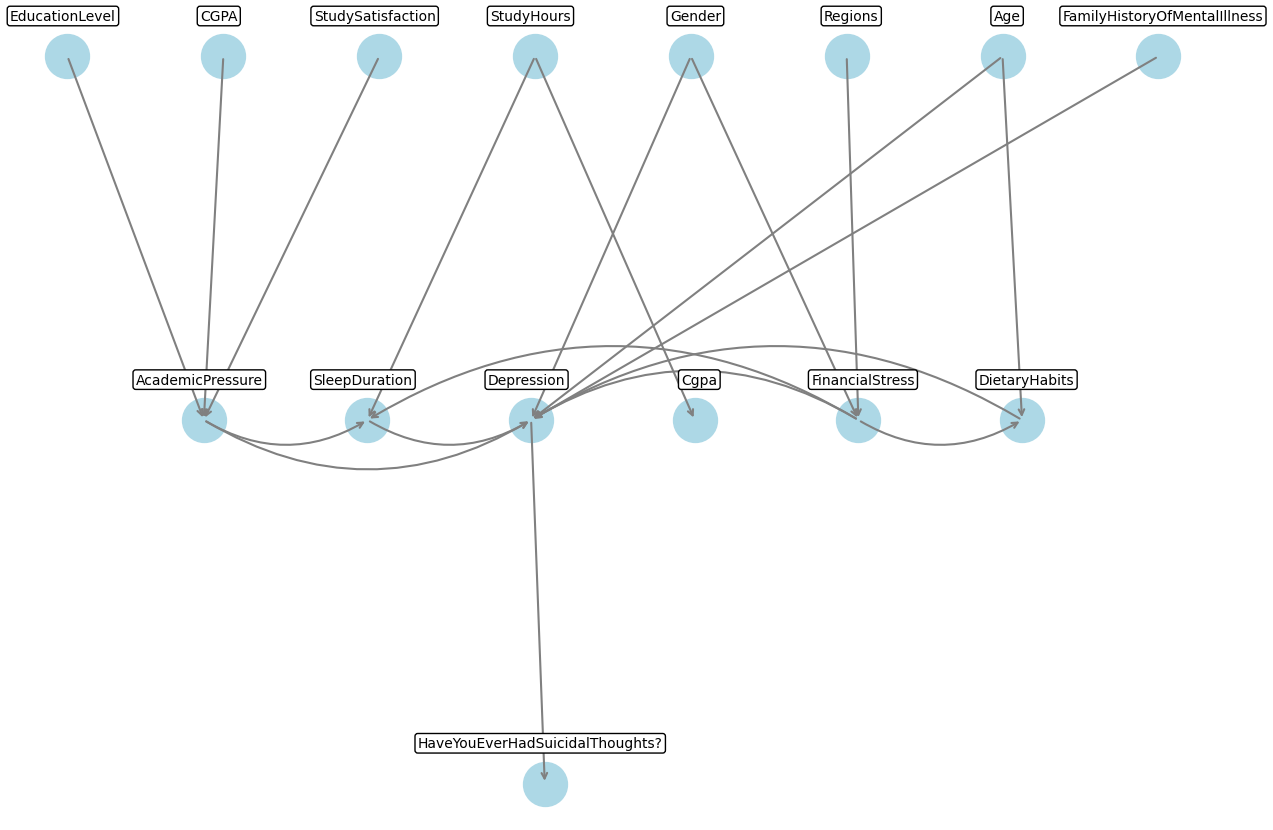

In [ ]:
from pgmpy.models import BayesianNetwork
import networkx as nx
from utils import hierarchical_layout, draw_graph

# # Network Pelle with Stress
# network_structure = [
#     ("EducationLevel", "AcademicPressure"),
#     ("CGPA", "AcademicPressure"),
#     ("StudySatisfaction", "AcademicPressure"),
#     ("StudyHours", "Cgpa"),
#     ("StudyHours", "SleepDuration"),
#     ("AcademicPressure", "SleepDuration"), # https://www.academia.edu/126545022/The_Relationship_of_Academic_Stress_Sleep_Quality_and_Self_Esteem_Among_University_Students
#     ("AcademicPressure", "Stress"),
#     ("Gender", "FinancialStress"), # https://www.tandfonline.com/doi/full/10.1080/00036846.2023.2273241
#     ("Regions", "FinancialStress"), 
#     ("Age", "DietaryHabits"), # https://pubmed.ncbi.nlm.nih.gov/11426286/
#     ("FinancialStress", "SleepDuration"), # https://www.mdpi.com/2076-328X/11/5/69
#     ("FinancialStress", "DietaryHabits"), # ???
#     ("FinancialStress", "Stress"),
#     ("SleepDuration", "Stress"), # https://academic.oup.com/sleep/article/47/Supplement_1/A57/7654261
#     ("DietaryHabits", "Stress"), # https://www.tandfonline.com/doi/pdf/10.1080/07448481.2024.2418521
#     ("Depression", "HaveYouEverHadSuicidalThoughts?"), # https://www.psychologytoday.com/us/basics/suicide/mental-health-conditions-suicide
#     ("Stress", "Depression"), # https://pmc.ncbi.nlm.nih.gov/articles/PMC3049314/
#     ("FamilyHistoryOfMentalIllness", "Depression"), # https://www.cambridge.org/core/journals/psychological-medicine/article/familial-risk-for-depressive-and-anxiety-disorders-associations-with-genetic-clinical-and-psychosocial-vulnerabilities/E48CB3FAAF084061C759CB440D2E8398
#     ("Gender", "Depression"), # https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/gender-differences-in-depression/0770B51752F17A5A081F9878B0952608
#     ("Age", "Depression"), # https://www.cambridge.org/core/journals/psychological-medicine/article/abs/age-differences-in-major-depression-results-from-the-national-comorbidity-survey-replication-ncsr/1DD685D5874EC40C25CF047DAA15E2F8
# ]

# # Network Pelle without Stress
# network_structure = [
#     ("EducationLevel", "AcademicPressure"),
#     ("CGPA", "AcademicPressure"),
#     ("StudySatisfaction", "AcademicPressure"),
#     ("StudyHours", "Cgpa"),
#     ("StudyHours", "SleepDuration"),
#     ("AcademicPressure", "SleepDuration"), # https://www.academia.edu/126545022/The_Relationship_of_Academic_Stress_Sleep_Quality_and_Self_Esteem_Among_University_Students
#     ("Gender", "FinancialStress"), # https://www.tandfonline.com/doi/full/10.1080/00036846.2023.2273241
#     ("Regions", "FinancialStress"), 
#     ("Age", "DietaryHabits"), # https://pubmed.ncbi.nlm.nih.gov/11426286/
#     ("FinancialStress", "SleepDuration"), # https://www.mdpi.com/2076-328X/11/5/69
#     ("FinancialStress", "DietaryHabits"), # ???
#     ("AcademicPressure", "Depression"),
#     ("FinancialStress", "Depression"),
#     ("SleepDuration", "Depression"),
#     ("DietaryHabits", "Depression"),
#     ("Depression", "HaveYouEverHadSuicidalThoughts?"), # https://www.psychologytoday.com/us/basics/suicide/mental-health-conditions-suicide
#     ("FamilyHistoryOfMentalIllness", "Depression"), # https://www.cambridge.org/core/journals/psychological-medicine/article/familial-risk-for-depressive-and-anxiety-disorders-associations-with-genetic-clinical-and-psychosocial-vulnerabilities/E48CB3FAAF084061C759CB440D2E8398
#     ("Gender", "Depression"), # https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/gender-differences-in-depression/0770B51752F17A5A081F9878B0952608
#     ("Age", "Depression"), # https://www.cambridge.org/core/journals/psychological-medicine/article/abs/age-differences-in-major-depression-results-from-the-national-comorbidity-survey-replication-ncsr/1DD685D5874EC40C25CF047DAA15E2F8
# ]

# # Network Giorgio with Stress
# network_structure = [
#     ("Age","AcademicPressure"),
#     ("Age", "EducationLevel"),
#     ("Age", "Depression"),
#     ("Gender", "DietaryHabits"),
#     ("FinancialStress", "AcademicPressure"),
#     ("FinancialStress", "Stress"),
#     ("FinancialStress", "DietaryHabits"),
#     ("Cgpa", "StudySatisfaction"),
#     ("Cgpa", "AcademicPressure"),
#     ("StudySatisfaction", "AcademicPressure"),
#     ("AcademicPressure", "Stress"),
#     ("SleepDuration", "Stress"),
#     ("StudyHours", "Stress"),
#     ("Stress", "Depression"),
#     ("DietaryHabits", "Depression"),
#     ("FamilyHistoryOfMentalIllness", "Depression"),
#     ("Depression", "HaveYouEverHadSuicidalThoughts?")
# ]

# # Network Giorgio without Stress
# network_structure = [
#     ("Age", "AcademicPressure"),
#     ("Age", "EducationLevel"),
#     ("Age", "Depression"),
#     ("Gender", "DietaryHabits"),
#     ("FinancialStress", "AcademicPressure"),
#     ("FinancialStress", "DietaryHabits"),
#     ("FinancialStress", "Depression"),  
#     ("Cgpa", "StudySatisfaction"),
#     ("Cgpa", "AcademicPressure"),
#     ("StudySatisfaction", "AcademicPressure"),
#     ("AcademicPressure", "Depression"),  
#     ("SleepDuration", "Depression"),  
#     ("StudyHours", "Depression"),  
#     ("DietaryHabits", "Depression"),
#     ("FamilyHistoryOfMentalIllness", "Depression"),
#     ("Depression", "HaveYouEverHadSuicidalThoughts?")
# ]

BN = BayesianNetwork(network_structure)

# Plot its graph
G = nx.DiGraph()
G.add_edges_from(BN.edges())
pos = hierarchical_layout(G, horizontal_spacing=3.0)
draw_graph(G, pos)

# Fit the network with the processed data

In [33]:
for c in data.columns:
    if c not in BN.nodes() : print(c)

Regions
EducationCategory


In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator, ExpectationMaximization, BayesianEstimator
BN.fit(
    data=data.drop(columns=["Regions", "EducationCategory"]), 
    estimator=ExpectationMaximization,
)

ValueError: variable names of the model must be identical to column names in data

# Explore some features

In [ ]:
# Markov blanket of a node to understand which variables directly influence that node
node = "NodeName"
print(f"Markov Blanket of {node}:",BN.get_markov_blanket(node))

...

NameError: name 'data' is not defined

# Evaluate the model

In [ ]:
from pgmpy.estimators import PC, HillClimbSearch, BicScore
from pgmpy.metrics.metrics import SHD, correlation_score, fisher_c, implied_cis, log_likelihood_score, structure_score

hc = HillClimbSearch(data)
learned_model = hc.estimate(scoring_method=BicScore(data))  # Estimate a comparison model

# Structural difference score
# => SHD is defined as total number of basic operations: adding edges, removing edges, 
# and reversing edges required to transform one graph to the other. 
# It is a symmetrical measure.
shd_value = SHD(true_model, learned_model)

# Distribution comparison
# => Function to score how well the model structure represents the correlations in 
# the data. The model doesn’t need to be parameterized for this score.
correlation = correlation_score(true_model, learned_model, data)

# Returns a p-value for testing whether the given data is 
# faithful to the model structure’s constraints.
fisher_score = fisher_c(true_model, data)

# Tests the implied Conditional Independences (CI) of the DAG in the given data. 
# Each missing edge in a model structure implies a CI statement. If the distribution 
# of the data is faithful to the constraints of the model structure, these CI statements 
# should hold in the data as well. This function runs statistical tests for each implied 
# CI on the given data.
cis = implied_cis(true_model)

# The log-likelihood measure can be used to check how well the specified model describes 
# the data. This method requires the parameters of the model to be specified as well. 
# !! Direct interpretation of this score is difficult but can be used to compare the fit of two or more models. !!
# A higher score means ab better fit.
log_likelihood = log_likelihood_score(true_model, data)

# Uses the standard model scoring methods to give a score for each structure. 
# The score doesn’t have very straight forward interpretebility but can be used to 
# compare different models. A higher score represents a better fit.
structure_s = structure_score(true_model, data, scoring_method=BicScore(data))

# Queries

In [ ]:
from pgmpy.inference import VariableElimination
exact_infer = VariableElimination(BN)
exact_result = exact_infer.query(   # P(C|A=1)
    variables=['C'], 
    evidence={'A': 1}
)

from pgmpy.sampling import BayesianModelSampling
sampler = BayesianModelSampling(BN)
samples = sampler.forward_sample(size=10000)
filtered_samples = samples[samples['A'] == 1]
approx_result = filtered_samples['C'].value_counts(normalize=True)

print("Exact result: ", exact_result)
print("Approx result: ", approx_result)

Ellipsis